In [2]:
import numpy as np
import pandas as pd
import os
import cv2

Covid = os.listdir("C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\test\\Covid")
Normal=os.listdir("C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\test\\Normal")


import os
for dirname, _, filenames in os.walk('C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\CNN_model.ipynb
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\DT_model.ipynb
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\sam.jpeg
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\SVM_model.ipynb
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\XGB_model.ipynb
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\X_ray_(Covid_19_Pneumonia)_Heat_map.ipynb
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0100.jpeg
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0102.jpeg
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0105.png
C:

In [3]:
train_dir = r"C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\train\\"
test_dir = r"C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\test\\"


In [4]:
categories = ['Covid','Normal']
y_train = []
x_train = []
x_test = []
y_test = []
Batch_Size = 32
INIT_LR = 1e-4
EPOCHES = 10


for category in categories:
    path = os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(500,500))
        image = image / 255
        x_train.append(image)
        y_train.append(category)


for category in categories:
    path = os.path.join(test_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(500,500))
        image = image / 255
        x_test.append(image)
        y_test.append(category)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# 1. Feature Extraction: Flatten the image pixels
x_train_flat = np.array([image.flatten() for image in x_train])
x_test_flat = np.array([image.flatten() for image in x_test])

# 2. Data Preparation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_test_binarized = lb.transform(y_test)
y_train_categorical = to_categorical(y_train_binarized, num_classes=2)
y_test_categorical = to_categorical(y_test_binarized, num_classes=2)
y_train_flat = np.argmax(y_train_categorical, axis=1)
y_test_flat = np.argmax(y_test_categorical, axis=1)

# Optional: Scale the features
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)


In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score


# 3. Model Selection and Hyperparameter Tuning
model = svm.SVC(EPOCHES = EPOCHES)
param_grid = {'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, cv=5)  # 5-fold cross-validation

# 4. Model Training
grid.fit(x_train_flat, y_train_flat)

# Print best parameters after tuning
print("Best Parameters: ", grid.best_params_)

# 5. Model Evaluation
grid_predictions = grid.predict(x_test_flat)
print("\nClassification Report:\n", classification_report(y_test_flat, grid_predictions))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .............................gamma=1, kernel=linear; total time=   2.4s
[CV] END .............................gamma=1, kernel=linear; total time=   2.4s
[CV] END .............................gamma=1, kernel=linear; total time=   2.3s
[CV] END .............................gamma=1, kernel=linear; total time=   2.2s
[CV] END .............................gamma=1, kernel=linear; total time=   2.5s
[CV] END ................................gamma=1, kernel=rbf; total time=  17.5s
[CV] END ................................gamma=1, kernel=rbf; total time=  16.4s
[CV] END ................................gamma=1, kernel=rbf; total time=  16.4s
[CV] END ................................gamma=1, kernel=rbf; total time=  16.8s
[CV] END ................................gamma=1, kernel=rbf; total time=  18.0s
[CV] END ...........................gamma=0.1, kernel=linear; total time=   2.3s
[CV] END ...........................gamma=0.1, ke

In [8]:
print("Accuracy: ", accuracy_score(y_test_flat, grid_predictions))

Accuracy:  0.9583333333333334


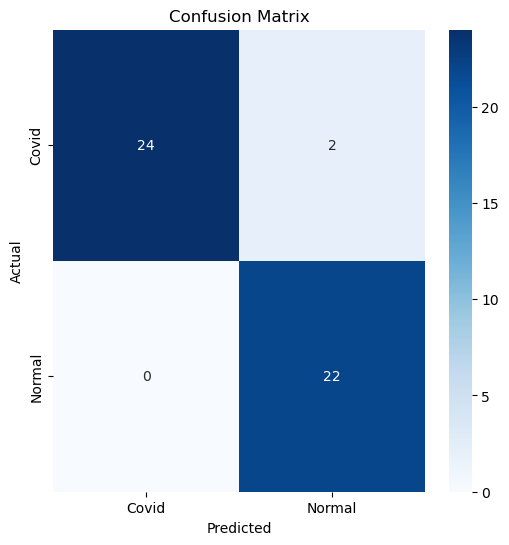

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_flat, grid_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


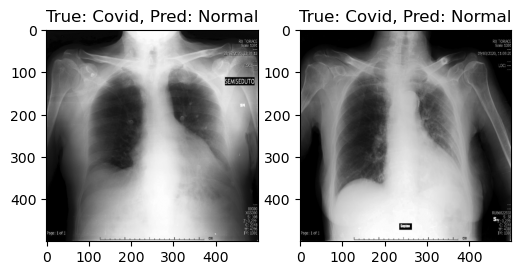

In [13]:
misclassified_idx = np.where(y_test_flat != grid_predictions)[0]
num_misclassified = len(misclassified_idx)
fig, axes = plt.subplots(1, num_misclassified, figsize=(3 * num_misclassified, 12))
for i in range(num_misclassified):
    idx = misclassified_idx[i]
    axes[i].imshow(x_test[idx])
    axes[i].set_title(f"True: {categories[y_test_flat[idx]]}, Pred: {categories[grid_predictions[idx]]}")
plt.show()

